# Cardiovascular Disease Dataset

We will study with a dataset on Cardiovascular Disease.

We'll try to understand the concepts like

- true means,
- confidence intervals,
- one sample t test,
- independent samples t test,
- homogenity of variance check (Levene's test),
- One-way ANOVA,
- Chi-square test.

Dataset from: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

# Data Preparation

⭐ Import pandas, scipy.stats, seaborn, and matplotlib.pyplot libraries

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

⭐Run the following code to read in the "cardio.csv" file.

In [2]:
df = pd.read_csv("cardio.csv", sep=";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.shape

(70000, 13)

In [6]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


⭐Let's get rid of the outliers, moreover blood pressure could not be negative value!

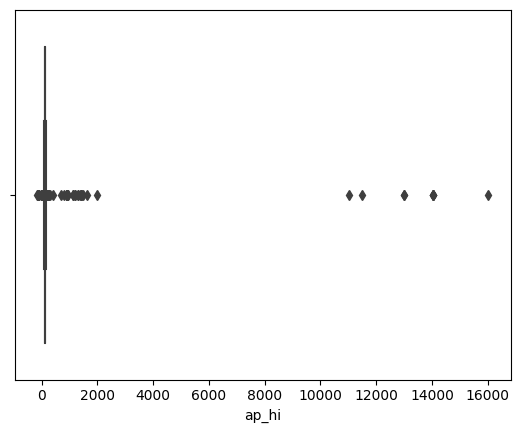

In [7]:
sns.boxplot(x="ap_hi", data=df);

## Task-1. Is the Systolic blood pressure population mean 122mmhg?

ap_hi => It's the Systolic blood pressure i.e. Pressure exerted when Blood is ejected in arteries. Normal value : 122 mm Hg for all adults aged 18 and over

⭐What is the mean for Systolic blood pressure?

In [8]:
df.ap_hi.mean()

128.8172857142857

⭐What is the standard deviation for Systolic blood pressure?

In [9]:
df.ap_hi.std()

154.01141945609137

⭐What is the standard error of the mean for Systolic blood pressure?

In [10]:
df.ap_hi.sem()

0.5821084499212461

⭐What are the descriptive statistics of the mean for Systolic blood pressure?

In [27]:
df.ap_hi.describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

## Confidence Interval using the t Distribution

Key Notes about Confidence Intervals

💡A point estimate is a single number.

💡A confidence interval, naturally, is an interval.

💡Confidence intervals are the typical way to present estimates as an interval range.

💡The point estimate is located exactly in the middle of the confidence interval.

💡However, confidence intervals provide much more information and are preferred when making inferences.

💡The more data you have, the less variable a sample estimate will be.

💡The lower the level of confidence you can tolerate, the narrower the confidence interval will be.

⭐Investigate the given task by calculating the confidence interval. (Use 90%, 95% and 99% CIs)

In [11]:
stats.t.interval(alpha=0.90, df=500-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

C:\Users\nazli\AppData\Local\Temp\ipykernel_3808\2058105034.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  stats.t.interval(alpha=0.90, df=500-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())


(127.85802164152962, 129.7765497870418)

In [12]:
stats.t.interval(alpha=0.95, df=500-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

C:\Users\nazli\AppData\Local\Temp\ipykernel_3808\3349223932.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  stats.t.interval(alpha=0.95, df=500-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())


(127.67360013398316, 129.96097129458823)

In [13]:
stats.t.interval(alpha=0.99, df=500-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())

C:\Users\nazli\AppData\Local\Temp\ipykernel_3808\939194583.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  stats.t.interval(alpha=0.99, df=500-1, loc=df.ap_hi.mean(), scale=df.ap_hi.sem())


(127.31211760183572, 130.32245382673568)

## One Sample t Test

⭐Investigate the given task by using One Sample t Test.

Key Notes about Hypothesis Testing (Significance Testing)

💡Assumptions

💡Null and Alternative Hypothesis

💡Test Statistic

💡P-value

💡Conclusion

Conduct the significance test. Use scipy.stats.ttest_1samp

In [14]:
#H0: mu = 122
#Ha: mu != 122

In [15]:
stats.ttest_1samp(df.ap_hi, 122)


Ttest_1sampResult(statistic=11.711367040296386, pvalue=1.1931999418088713e-31)

In [16]:
# conc: reject to null beacuse: pvalue < alpha

## Task-2. Is There a Significant Difference Between Males and Females in Systolic Blood Pressure?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [17]:
df.groupby("gender").describe()["ap_hi"].T

gender,1,2
count,45530.000000,24470.000000
mean,128.139249,130.078872
std,158.054522,146.186152
min,-140.000000,-150.000000
25%,120.000000,120.000000
50%,120.000000,120.000000
75%,140.000000,140.000000
max,16020.000000,14020.000000


___🚀Test the assumption of homogeneity of variance Hint: Levene’s Test

The hypotheses for Levene’s test are:

H0: "the population variances of group 1 and 2 are equal"

H1: "the population variances of group 1 and 2 are not equal"

In [18]:
stats.levene(df[df["gender"]==1]["ap_hi"], df[df["gender"]==2]["ap_hi"])

LeveneResult(statistic=0.015077515400612819, pvalue=0.9022733223058561)

___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [19]:
stat, p = stats.levene(df[df["gender"]==1]["ap_hi"],df[df["gender"]==2]["ap_hi"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.015, p=0.902
The population variances of group 1 and 2 are equal (fail to reject H0)


## Task-3. Is There a Relationship Between Glucose and Systolic Blood Pressure?

⭐Draw a boxplot to see the relationship.

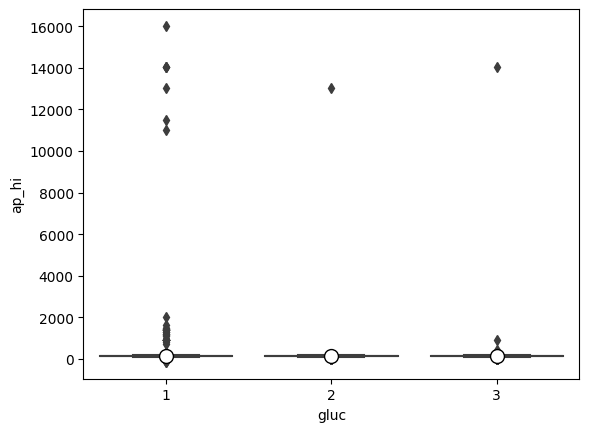

In [20]:
sns.boxplot(x="gluc", y="ap_hi", data=df, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

⭐Show the descriptive statistics of 3 groups.

In [21]:
df.groupby("gluc").describe()["ap_hi"]

,count,mean,std,min,25%,50%,75%,max
gluc,,,,,,,,
1,59479.0,127.982633,147.654515,-150.0,120.0,120.0,140.0,16020.0
2,5190.0,133.872832,179.965896,11.0,120.0,130.0,140.0,13010.0
3,5331.0,133.207841,191.407819,10.0,120.0,130.0,140.0,14020.0


⭐Conduct the relavant statistical test to see if there is a significant difference between the mean of the groups.

In [22]:
#H0: All means are equal (mu1=mu2=mu3)
#Ha: At least one mean is different

In [23]:
stats.f_oneway(df[df["gluc"]==1]["ap_hi"], df[df["gluc"]==2]["ap_hi"], df[df["gluc"]==3]["ap_hi"])

F_onewayResult(statistic=5.836722951882409, pvalue=0.002919811239135089)

In [24]:
# conc: pvalue > alpha => all means are equal

## Task-4. Is There a Relationship Between Physical activity vs. Presence or absence of cardiovascular disease?

### Physical activity vs. Presence or absence of cardiovascular disease

⭐Create a crosstab using Pandas.

In [25]:
# H0: The two categorical variables are independent
# Ha: the two categorical variables are dependent

⭐Conduct chi-square test to see if there is a relationship between 2 categorical variables.

In [26]:
ct = pd.crosstab(df.active, df.cardio)  # cross table for chi2 test
ct

cardio,0,1
active,,
0,6378,7361
1,28643,27618
